<a href="https://colab.research.google.com/github/abrham17/knap-sack/blob/main/knapsack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **knap-sack problem**

given a set of objects which have both weight and value. what is the maximum
value that we can obtain by selecting a subset of these objects such that the sum of the weights does not exceed a certain capacity.

**Brute Force approach**

In [ ]:
def knapSackBf(cap , n , weights = [] , values = []):
  if n==0 or cap ==0:
    return 0
  elif weights[n-1] > cap:
    return knapSackBf(cap, n-1 , weights , values)
  else:
    return max(values[n-1] + knapSackBf(cap - weights[n-1] , n-1 , weights , values) , knapSackBf( cap , n-1 , weights , values))


**dynamic programming**

In [ ]:
def knapSackDp(weights, values, n, capacity, memo):
    if n == 0 or capacity == 0:
        return 0

    if (n, capacity) in memo:
        return memo[(n, capacity)]

    if weights[n - 1] > capacity:
        result = knapSackDp(weights, values, n - 1, capacity, memo)
    else:
        result = max(values[n - 1] + knapSackDp(weights, values, n - 1, capacity - weights[n - 1], memo) , knapSackDp(weights, values, n - 1, capacity, memo))

    memo[(n, capacity)] = result
    return result


**comparing the results using matplotlib and time**

In [ ]:
# calculating time for brute force starting from n 3 upto 30 by generating random numbers for weights and values
import random
import time
ns = 31
test_ns = list(range(3, ns))
execution_times = []

for n in test_ns:
    weights = [random.randint(1, 20) for _ in range(n)]
    values = [random.randint(1, 20) for _ in range(n)]
    capacity = int(sum(weights) * 0.7)
    # Time for the brute-force solution
    start = time.time()
    knapSackBf(capacity, n, weights, values)
    end = time.time()

    execution_times.append(end - start)
print(execution_times)

[1.1920928955078125e-05, 5.7220458984375e-06, 9.775161743164062e-06, 1.811981201171875e-05, 4.5299530029296875e-05, 7.748603820800781e-05, 0.00016021728515625, 0.00033211708068847656, 0.0006487369537353516, 0.0014836788177490234, 0.002656221389770508, 0.00535130500793457, 0.013272285461425781, 0.028400421142578125, 0.043363332748413086, 0.08748626708984375, 0.17708086967468262, 0.40805506706237793, 0.7226245403289795, 2.6436047554016113, 3.1154589653015137, 6.020983934402466, 13.247886657714844, 33.8762321472168, 60.91245722770691, 109.25842714309692, 225.6215522289276, 433.4278018474579]


In [ ]:
# calculating time for brute force starting from n 3 upto 30 by generating random numbers for weights and values
import random
import time
ns = 31
test_ns = list(range(3, ns))
execution_times_dp = []

for n in test_ns:
    weights = [random.randint(1, 20) for _ in range(n)]
    values = [random.randint(1, 20) for _ in range(n)]
    capacity = int(sum(weights) * 0.7)
    # Time for the dynamic rpogramming
    start = time.time()
    knapSackDp(weights , values , n ,capacity , {})
    end = time.time()

    execution_times_dp.append(end - start)
print(execution_times_dp)

[1.33514404296875e-05, 9.298324584960938e-06, 1.7642974853515625e-05, 3.147125244140625e-05, 6.175041198730469e-05, 0.00010085105895996094, 0.00010371208190917969, 0.00020003318786621094, 0.0002758502960205078, 0.00045371055603027344, 0.0004055500030517578, 0.0009210109710693359, 0.00044226646423339844, 0.0026128292083740234, 0.0009031295776367188, 0.001233816146850586, 0.002700328826904297, 0.0011951923370361328, 0.0021424293518066406, 0.0018634796142578125, 0.0015878677368164062, 0.001577615737915039, 0.0024306774139404297, 0.0023229122161865234, 0.001993417739868164, 0.0033659934997558594, 0.0024869441986083984, 0.002949237823486328]


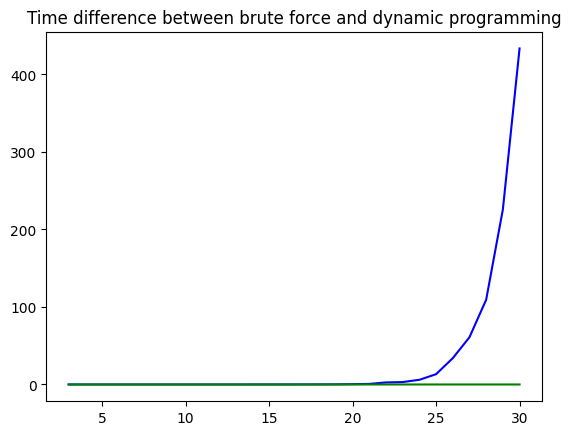

In [ ]:
import matplotlib.pyplot as plt
plt.title("Time difference between brute force and dynamic programming")
plt.plot(test_ns, execution_times, label='Brute Force' , c='b')
plt.plot(test_ns, execution_times_dp, label='Dynamic Programming' , c= 'g')
plt.show()